In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(3818, 2)

In [3]:
df.head()

,Time,domain
0,4/13/2022 18:57,localhost:8888
1,4/13/2022 18:57,localhost:8888
2,4/13/2022 18:56,www.google.com
3,4/13/2022 18:55,localhost:8888
4,4/13/2022 18:55,www.roseindia.net


In [4]:
df.tail()

,Time,domain
3813,1/15/2022 11:26,qatarairways.com
3814,1/15/2022 11:26,www.qatarairways.com
3815,1/15/2022 11:26,www.qatarairways.com
3816,1/15/2022 11:26,www.qatarairways.com
3817,1/15/2022 11:26,www.qatarairways.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

360

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-04-13 18:57:00,localhost:8888
1,2022-04-13 18:57:00,localhost:8888
2,2022-04-13 18:56:00,www.google.com
3,2022-04-13 18:55:00,localhost:8888
4,2022-04-13 18:55:00,www.roseindia.net


In [14]:
df['domain'].value_counts()[:50]

www.google.com                                                   464
www.youtube.com                                                  316
blackboard.umbc.edu                                              199
www.hulu.com                                                     174
courses.3rdmil.com                                               159
github.com                                                       127
data.world                                                       106
webauth.umbc.edu                                                  89
www.coursehero.com                                                88
mail.google.com                                                   77
api-4f567d87.duosecurity.com                                      73
localhost:8888                                                    68
stackoverflow.com                                                 64
www.amazon.com                                                    58
my3.my.umbc.edu                   

<AxesSubplot:>

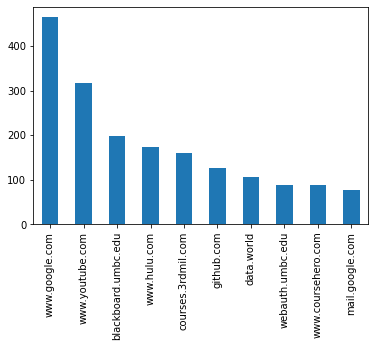

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     221
1      65
2       5
3       5
9      17
10     33
11     90
12    165
13    105
14     91
15    178
16    246
17    405
18    380
19    357
20    353
21    235
22    123
23    384
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

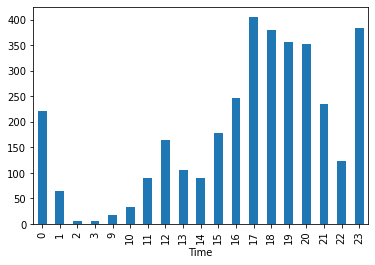

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-04-13 18:57:00,localhost:8888,Wednesday,2
1,2022-04-13 18:57:00,localhost:8888,Wednesday,2
2,2022-04-13 18:56:00,www.google.com,Wednesday,2
3,2022-04-13 18:55:00,localhost:8888,Wednesday,2
4,2022-04-13 18:55:00,www.roseindia.net,Wednesday,2


In [19]:
df['Day'].value_counts()

Friday       653
Thursday     624
Sunday       582
Tuesday      578
Saturday     391
Wednesday    351
Monday       279
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    279
1    578
2    351
3    624
4    653
5    391
6    582
Name: DayIndex, dtype: int64

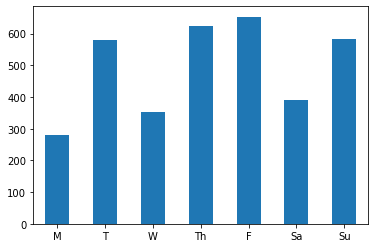

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-04-13 18:57:00,localhost:8888,Wednesday,2,False
1,2022-04-13 18:57:00,localhost:8888,Wednesday,2,False
2,2022-04-13 18:56:00,www.google.com,Wednesday,2,False
3,2022-04-13 18:55:00,localhost:8888,Wednesday,2,False
4,2022-04-13 18:55:00,www.roseindia.net,Wednesday,2,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
83,2022-04-10 22:00:00,localhost:8888,Sunday,6,True
84,2022-04-10 19:47:00,www.hulu.com,Sunday,6,True
85,2022-04-10 19:45:00,www.hulu.com,Sunday,6,True
86,2022-04-10 19:44:00,github.com,Sunday,6,True
87,2022-04-10 19:44:00,github.com,Sunday,6,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com        367
www.youtube.com       173
courses.3rdmil.com    159
www.hulu.com          134
github.com             97
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.youtube.com        143
data.world             103
blackboard.umbc.edu    103
www.google.com          97
www.hulu.com            40
Name: domain, dtype: int64

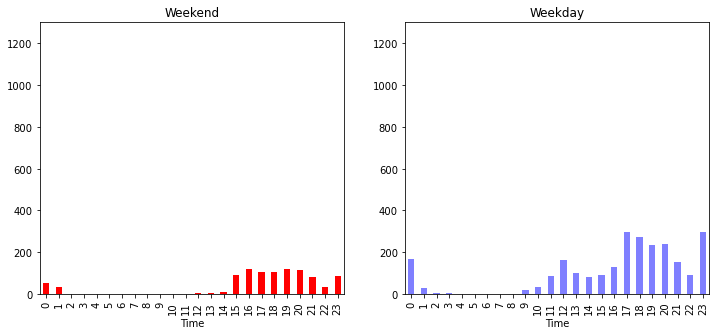

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

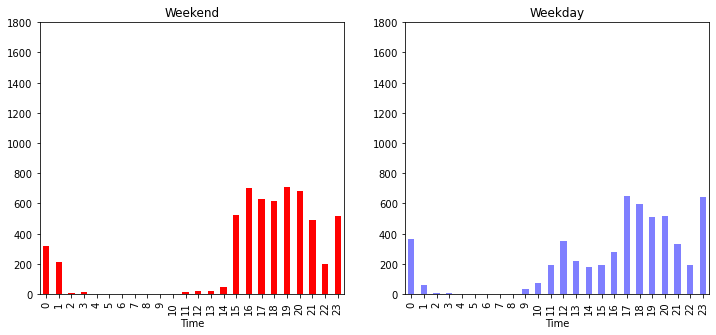

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.google.com         464
www.youtube.com        316
blackboard.umbc.edu    199
www.hulu.com           174
courses.3rdmil.com     159
github.com             127
data.world             106
webauth.umbc.edu        89
www.coursehero.com      88
mail.google.com         77
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

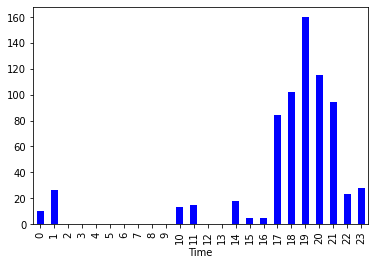

In [33]:
_= show_domain_stats('blackboard', 'blue')

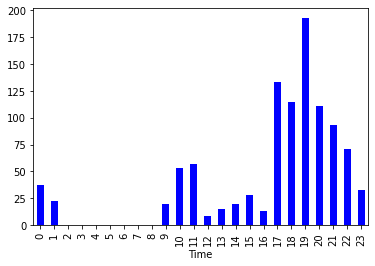

In [41]:
_= show_domain_stats('umbc', 'blue')

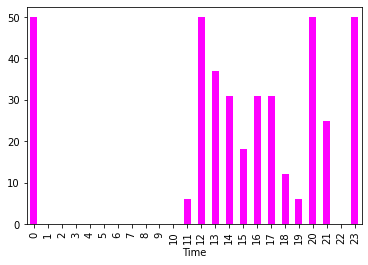

In [35]:
_ = show_domain_stats('stackover', 'magenta')


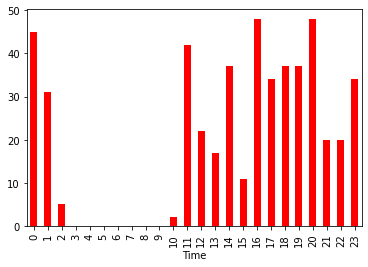

In [40]:
_ = show_domain_stats('hulu', 'red')

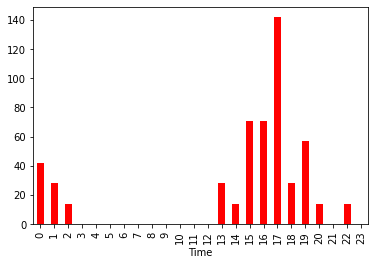

In [37]:
_ = show_domain_stats('netflix', 'red')

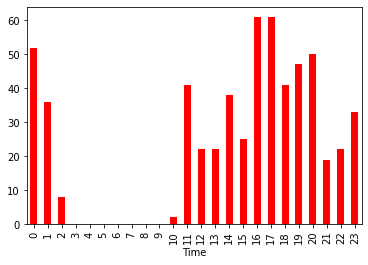

In [42]:
_ = show_domain_stats('netflix|hulu|prime', 'red')

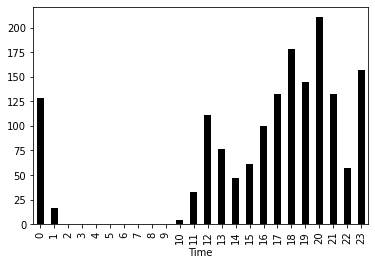

In [43]:
_=show_domain_stats('google', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. Looks like the individual is a student and not working currently by looking at the hours she spends on blackboard. So this has to be a personal computer
2. There is no such site which indicates that the individual is employed. But looking at the blackboard and umbc websites, it seems that the individual is a student at UMBC
3. The individual majorly spends time on youtube and hulu. So seems like she likes entertainment videos and movies and shows. She also sleeps around 2 and wakes up around 10. So she keeps up at night.
4. The most interesting thing about this individual is that she is generally active in the evening. Even university related work is being done in the evening so looks like she does all her work in the evening. One more interesting fact is that, she spends maximum time on blackboard, umbc site and courses/webauth which seeam related to umbc which indicates that she is very very dedicated towards her studies.